# Python Tool Project - pillow
* Li Ding  
* Menglin Cui  
* Zhangqi Li  
* Yining Xu  

# 1. Motivation
## The main objective of the library and the problem it is trying to solve
Python Imaging Library (abbreviated as PIL) (in newer versions known as Pillow) is a free library for the Python programming language that adds support for opening, manipulating, and saving many different image file formats. Some of the file formats supported include PPM, PNG, JPEG, GIF, TIFF, and BMP. It is also possible to create new file decoders to expand the library of file formats accessible.

Pillow offers several standard procedures for image manipulation. These include:
 - per-pixel manipulations,
 - masking and transparency handling,
 - image filtering, such as blurring, contouring, smoothing, or edge finding,
 - image enhancing, such as sharpening, adjusting brightness, contrast or color,
 - adding text to images and much more.

# 2. Context 
## Alternative solutions for solving the problem
PIL is the best-known library for image processing. However if we are simply doing basic manipulation, we are probably better off with the Python bindings for ImageMagick, which will be a good deal more efficient than writing the transforms in Python. 

Wand is a great library for simple manipulation like image file format conversion, cropping, resizing, watermarking and basic compositing. It's build on top of ImageMagick's MagicWand C library, but exposes a beautiful Pythonic API. However, it is not very speedy in Cpython. For example, Wand could be used as a custom image resizing and watermarking tool, instead of pillow.

Another better choice might be in the numpy based libraries: mahotas, scikits.image, or scipy.ndimage. All of these work based on numpy arrays, so we can mix and match functions from one library and another.

SciPy has a whole package dedicated to image processing: scipy.ndimage. Scipy is in effect the standard general numerical calculations package; it is based on the de facto standard array-manipulation module NumPy: images can also be manipulated as array of numbers. As for image display, Matplotlib (also part of the "science trilogy") makes displaying images quite simple.
Also, a better solution to medical imaging could be SimpleITK. 

# 3. Installation instructions, platform restriction and dependent libraries 

## Installation instructions （run in command line)
#Install Pillow with pip

$ pip install Pillow

#Or use easy_install for installing Python Eggs as pip does not support them

$ easy_install Pillow

#Or download and extract the compressed archive from PyPI and inside it run

$ python setup.py install

#For OS X users (The easiest way to install external libraries is via Homebrew. After you install Homebrew, run:)

$ brew install libtiff libjpeg webp little-cms2

$ pip install Pillow

## Platform restriction
Pillow and PIL cannot co-exist in the same environment. Before installing Pillow, please uninstall PIL.
Pillow >= 1.0 no longer supports “import Image”. Please use “from PIL import Image” instead.
Pillow >= 2.1.0 no longer supports “import _imaging”. Please use “from PIL.Image import core as _imaging” instead.
In general, we aim to support all current versions of Linux, OS X, and Windows.

## Dependent libraries
Many of Pillow’s features require external libraries:
libjpeg provides JPEG functionality.
Pillow has been tested with libjpeg versions 6b, 8, and 9
zlib provides access to compressed PNGs
libtiff provides group4 tiff functionality
Pillow has been tested with libtiff versions 3.x and 4.0
libfreetype provides type related services
littlecms provides color management
libwebp provides the Webp format.
Pillow has been tested with version 0.1.3, which does not read transparent webp files. Version 0.3.0 supports transparency.
tcl/tk provides support for tkinter bitmap and photo images.

In [1]:
import PIL

# 4. Minimal working examples

In [1]:
#import
from PIL import Image

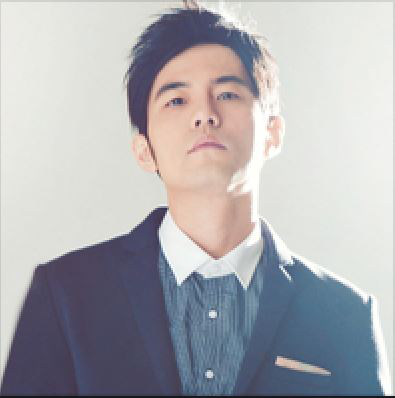

In [2]:
#load image
img = Image.open('jaychou.jpg')
img

In [4]:
#format of image
print(img.format)

JPEG


In [5]:
#mode of image
print(img.mode)

RGB


In [6]:
#size of image
Width, Height = img.size
print(Width, Height)

395 398


In [7]:
#show the image
img.show()

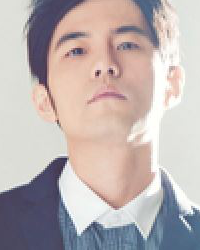

In [8]:
#cut the image
img.crop((100,50,300,300))

In [9]:
#save the image
img.save('new.bmp') 
img2 = Image.open('new.bmp')
print(img2.format) #BMP

BMP


# 5.Examples of typical use-cases of pillow
## 1) Adding text to images

In [11]:
#import pillow
from PIL import Image, ImageDraw, ImageFont

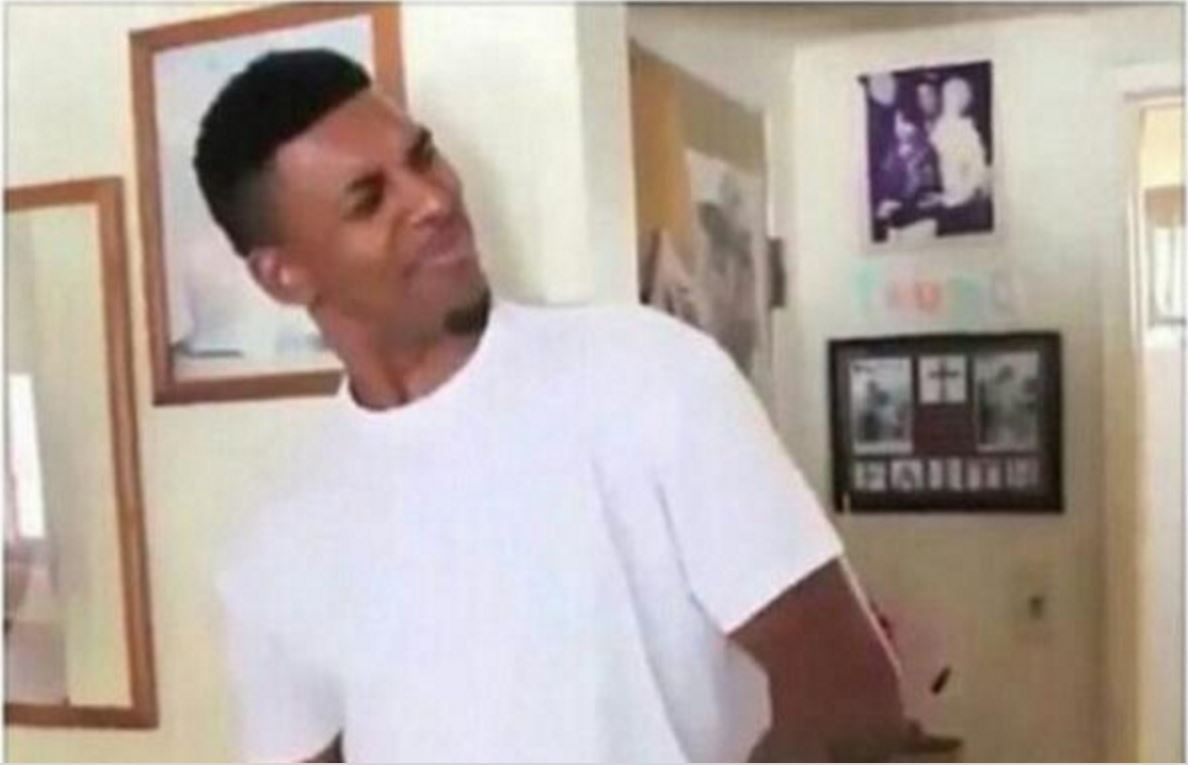

In [36]:
#load image
img = Image.open('nickyoung.jpg')
img

In [37]:
#modify the image
draw = ImageDraw.Draw(img)
#set font as Arial, color as 'ff0000' which is red
myfont = ImageFont.truetype('C:/windows/fonts/Arial.ttf', size=80)
fillcolor = "#ff0000"

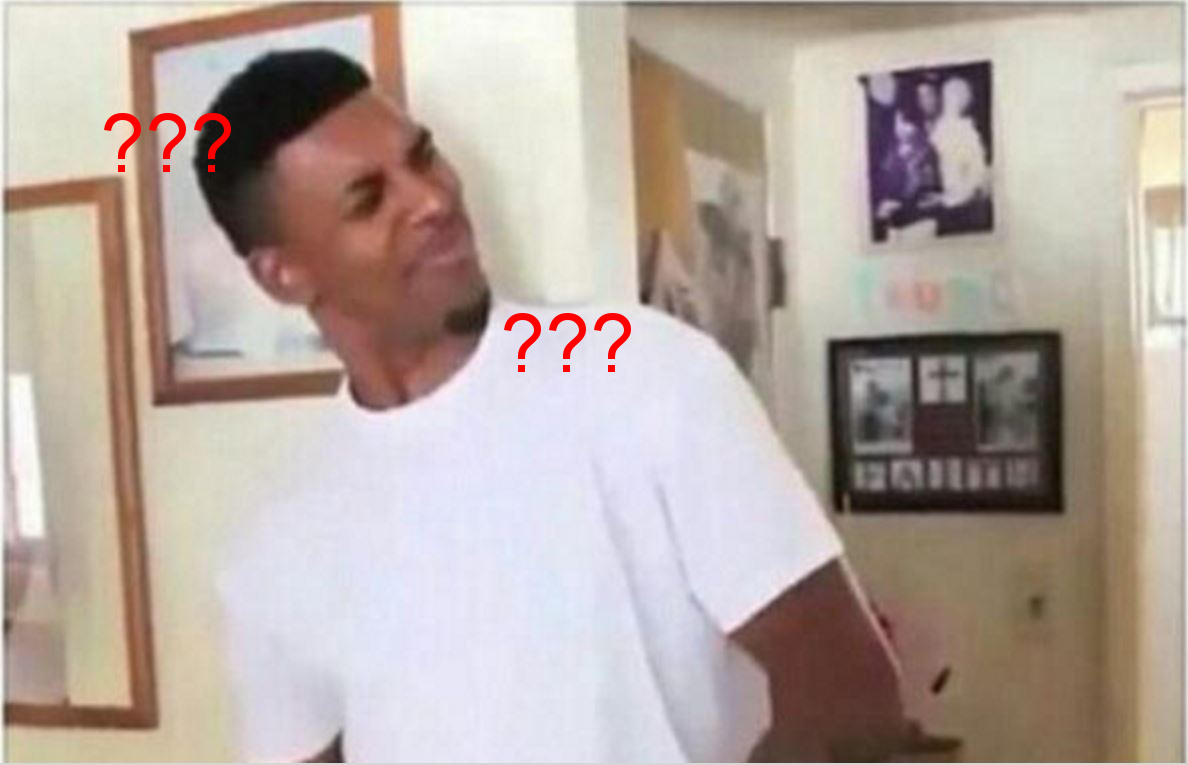

In [38]:
#add ??? to the image
draw.text((100,100), '???', font = myfont, fill = fillcolor)
draw.text((500,300), '???', font = myfont, fill = fillcolor)
img.save('nickyoungface.jpg', 'jpeg')
img

# 5.Examples of typical use-cases of pillow
## 2) Batch change resolution of images

In [23]:
#import
import os
import glob
from PIL import Image

In [39]:
def thumbnail_pic(path):
    #a = glob.glob(r'C:\Users\立\Desktop\UR\CIS442D Advanced BA\Pillow\Wallpaper\*.jpg')
    a = glob.glob(r'Wallpaper\*.jpg')
    i = 1
    for x in a:
        name = os.path.join(path, x)
        im = Image.open(name)
        #set resolution to 540*360
        im.thumbnail((540, 360))
        print(im.format, im.size, im.mode)
        #save the new image
        im.save(str(i) + '.jpg', 'JPEG')
        i += 1
    print('Done!')

if __name__ == '__main__':
    path = '.'
    thumbnail_pic(path)

JPEG (540, 303) RGB
JPEG (540, 303) RGB
JPEG (540, 303) RGB
JPEG (480, 360) RGB
JPEG (540, 360) RGB
JPEG (540, 337) RGB
Done!


# 5.Examples of typical use-cases of pillow
## 3) Classify nude pictures
* This is a project from an online course.
* The code can be downloaded through the link provided in the References part.
* Since the comments was written in Chinese on this website, we try to add some comments to help understand the code.

In [40]:
import sys
import os
import _io
from collections import namedtuple
from PIL import Image

In [47]:
class Nude(object):

    Skin = namedtuple("Skin", "id skin region x y")

    def __init__(self, path_or_image):
        # if path_or_image is image, assign the value
        if isinstance(path_or_image, Image.Image):
            self.image = path_or_image
        # if path_or_image is str, open the image
        elif isinstance(path_or_image, str):
            self.image = Image.open(path_or_image)

        # get color channels
        bands = self.image.getbands()
        # identify if it is Grey Scale Image, if so convert to RGB
        if len(bands) == 1:
            # creat a RGB image with same size
            new_img = Image.new("RGB", self.image.size)
            # copy Grey Scale Image to RGB, PIL converts color channel automatically
            new_img.paste(self.image)
            f = self.image.filename
            # replace self.image
            self.image = new_img
            self.image.filename = f

        
        self.skin_map = []
        
        self.detected_regions = []
        
        self.merge_regions = []
        
        self.skin_regions = []
        
        self.last_from, self.last_to = -1, -1
        
        self.result = None
        
        self.message = None
        self.width, self.height = self.image.size
        self.total_pixels = self.width * self.height

    def resize(self, maxwidth=1000, maxheight=1000):
        """
        resize the image based on maximum height and width
        NOTE: this may affect the result of agorithm

        NO CHANGE return 0
        width > maxwidth return 1
        height > maxheight return 2
        width, height > maxwidth, maxheight return 3

        """
        # store the return value
        ret = 0
        if maxwidth:
            if self.width > maxwidth:
                wpercent = (maxwidth / self.width)
                hsize = int((self.height * wpercent))
                fname = self.image.filename
                
                self.image = self.image.resize((maxwidth, hsize), Image.LANCZOS)
                self.image.filename = fname
                self.width, self.height = self.image.size
                self.total_pixels = self.width * self.height
                ret += 1
        if maxheight:
            if self.height > maxheight:
                hpercent = (maxheight / float(self.height))
                wsize = int((float(self.width) * float(hpercent)))
                fname = self.image.filename
                self.image = self.image.resize((wsize, maxheight), Image.LANCZOS)
                self.image.filename = fname
                self.width, self.height = self.image.size
                self.total_pixels = self.width * self.height
                ret += 2
        return ret

    # parse function
    def parse(self):
        # if already get result, return
        if self.result is not None:
            return self
        # get all the pixels of image
        pixels = self.image.load()
        # traverse all the pixels
        for y in range(self.height):
            for x in range(self.width):
                # get RGB values
                r = pixels[x, y][0]   # red
                g = pixels[x, y][1]   # green
                b = pixels[x, y][2]   # blue
                # identify if this pixel is the color of skin
                isSkin = True if self._classify_skin(r, g, b) else False
                # distribut id value to each pixel（1, 2, 3...height*width）
                # note that x, y start from 0
                _id = x + y * self.width + 1
                # create a skin object for each pixel and add it to self.skin_map
                self.skin_map.append(self.Skin(_id, isSkin, None, x, y))
                # if it is not the color of skin, skip the current loop
                if not isSkin:
                    continue

                check_indexes = [_id - 2, # left of current pixel
                                 _id - self.width - 2,  # upper left of current pixel
                                 _id - self.width - 1,  # upper of current pixel
                                 _id - self.width]  # upper right of current pixel
                
                region = -1
                # traverse pixel's neighbors
                for index in check_indexes:
                    # try to find neighbors which is skin, if not break the loop
                    try:
                        self.skin_map[index]
                    except IndexError:
                        break
                    # if neighbor is skin：
                    if self.skin_map[index].skin:
                        # if the region of current pixel and neighbor pixel is not -1, not same and has not been merged
                        if (self.skin_map[index].region != None and
                                region != None and region != -1 and
                                self.skin_map[index].region != region and
                                self.last_from != region and
                                self.last_to != self.skin_map[index].region) :
                            # then merge two region
                            self._add_merge(region, self.skin_map[index].region)
                        # record the region of neighbor pixel
                        region = self.skin_map[index].region
                # if region is -1 after traverse neighbors, none of neighbors is skin
                if region == -1:
                    #
                    _skin = self.skin_map[_id - 1]._replace(region=len(self.detected_regions))
                    self.skin_map[_id - 1] = _skin
                    # assgin this skin pixel as a new region
                    self.detected_regions.append([self.skin_map[_id - 1]])
                # if region is neither -1 nor none, this region is in the same skin region 
                elif region != None:
                    # assgin the region to the same as neighbor's region
                    _skin = self.skin_map[_id - 1]._replace(region=region)
                    self.skin_map[_id - 1] = _skin
                    # add the pixel to this region's pixel list
                    self.detected_regions[region].append(self.skin_map[_id - 1])
        # store the merged resion
        self._merge(self.detected_regions, self.merge_regions)
        # analyze skin region and return the result
        self._analyse_regions()
        return self


    # merge region list
    def _add_merge(self, _from, _to):
        
        self.last_from = _from
        self.last_to = _to

        from_index = -1

        to_index = -1


        # traverse all elements in self.merge_regions
        for index, region in enumerate(self.merge_regions):
            for r_index in region:
                if r_index == _from:
                    from_index = index
                if r_index == _to:
                    to_index = index

        # if both regions in self.merge_regions
        if from_index != -1 and to_index != -1:
            # if two regions in diffrent lists, merge
            if from_index != to_index:
                self.merge_regions[from_index].extend(self.merge_regions[to_index])
                del(self.merge_regions[to_index])
            return

        # if both regions not in self.merge_regions
        if from_index == -1 and to_index == -1:
            # create a new region list
            self.merge_regions.append([_from, _to])
            return
        # if one of two regions in self.merge_regions
        if from_index != -1 and to_index == -1:
            # add the one not in self.merge_regions to the region list
            self.merge_regions[from_index].append(_to)
            return
        if from_index == -1 and to_index != -1:
            self.merge_regions[to_index].append(_from)
            return

    # merge skin region
    def _merge(self, detected_regions, merge_regions):

        new_detected_regions = []


        for index, region in enumerate(merge_regions):
            try:
                new_detected_regions[index]
            except IndexError:
                new_detected_regions.append([])
            for r_index in region:
                new_detected_regions[index].extend(detected_regions[r_index])
                detected_regions[r_index] = []

        for region in detected_regions:
            if len(region) > 0:
                new_detected_regions.append(region)

        self._clear_regions(new_detected_regions)

    # clear skin region
    # only store skin region which has enough pixels
    def _clear_regions(self, detected_regions):
        for region in detected_regions:
            if len(region) > 30:
                self.skin_regions.append(region)

    # analyze region分析区域
    def _analyse_regions(self):
        # if the number of skin region is less than 3, return not nude
        if len(self.skin_regions) < 3:
            self.message = "Less than 3 skin regions ({_skin_regions_size})".format(
                _skin_regions_size=len(self.skin_regions))
            self.result = False
            return self.result

        # sort skin regions
        self.skin_regions = sorted(self.skin_regions, key=lambda s: len(s),
                                   reverse=True)

        # compute the number of skin pixels
        total_skin = float(sum([len(skin_region) for skin_region in self.skin_regions]))

        # if the ratio of skin region and whole image, return not nude
        if total_skin / self.total_pixels * 100 < 15:
            self.message = "Total skin percentage lower than 15 ({:.2f})".format(total_skin / self.total_pixels * 100)
            self.result = False
            return self.result

        # if the max skin region is less than 45% of whole skin region, return not nude
        if len(self.skin_regions[0]) / total_skin * 100 < 45:
            self.message = "The biggest region contains less than 45 ({:.2f})".format(len(self.skin_regions[0]) / total_skin * 100)
            self.result = False
            return self.result

        # if the number of skin regions is less than 60, return not nude
        if len(self.skin_regions) > 60:
            self.message = "More than 60 skin regions ({})".format(len(self.skin_regions))
            self.result = False
            return self.result

        # otherwise, return nude
        self.message = "Nude!!"
        self.result = True
        return self.result

    # classify skin based on pixel
    def _classify_skin(self, r, g, b):
        # based on RGB
        rgb_classifier = r > 95 and \
            g > 40 and g < 100 and \
            b > 20 and \
            max([r, g, b]) - min([r, g, b]) > 15 and \
            abs(r - g) > 15 and \
            r > g and \
            r > b
        # base on normalized RGB
        nr, ng, nb = self._to_normalized(r, g, b)
        norm_rgb_classifier = nr / ng > 1.185 and \
            float(r * b) / ((r + g + b) ** 2) > 0.107 and \
            float(r * g) / ((r + g + b) ** 2) > 0.112

        # based on HSV 
        h, s, v = self._to_hsv(r, g, b)
        hsv_classifier = h > 0 and \
            h < 35 and \
            s > 0.23 and \
            s < 0.68

        # based on YCbCr
        y, cb, cr = self._to_ycbcr(r, g,  b)
        ycbcr_classifier = 97.5 <= cb <= 142.5 and 134 <= cr <= 176

        # need to be improved
        # return rgb_classifier or norm_rgb_classifier or hsv_classifier or ycbcr_classifier
        return ycbcr_classifier

    def _to_normalized(self, r, g, b):
        if r == 0:
            r = 0.0001
        if g == 0:
            g = 0.0001
        if b == 0:
            b = 0.0001
        _sum = float(r + g + b)
        return [r / _sum, g / _sum, b / _sum]

    def _to_ycbcr(self, r, g, b):
        # fomular from：
        # http://stackoverflow.com/questions/19459831/rgb-to-ycbcr-conversion-problems
        y = .299*r + .587*g + .114*b
        cb = 128 - 0.168736*r - 0.331364*g + 0.5*b
        cr = 128 + 0.5*r - 0.418688*g - 0.081312*b
        return y, cb, cr

    def _to_hsv(self, r, g, b):
        h = 0
        _sum = float(r + g + b)
        _max = float(max([r, g, b]))
        _min = float(min([r, g, b]))
        diff = float(_max - _min)
        if _sum == 0:
            _sum = 0.0001

        if _max == r:
            if diff == 0:
                h = sys.maxsize
            else:
                h = (g - b) / diff
        elif _max == g:
            h = 2 + ((g - r) / diff)
        else:
            h = 4 + ((r - g) / diff)

        h *= 60
        if h < 0:
            h += 360

        return [h, 1.0 - (3.0 * (_min / _sum)), (1.0 / 3.0) * _max]

    def inspect(self):
        _image = '{} {} {}×{}'.format(self.image.filename, self.image.format, self.width, self.height)
        return "{_image}: result={_result} message='{_message}'".format(_image=_image, _result=self.result, _message=self.message)

    # show the skin
    def showSkinRegions(self):
        if self.result is None:
            return
        # ids of pixels
        skinIdSet = set()
        # copy the original image
        simage = self.image
        # load
        simageData = simage.load()

        # store the id to SkinIdSet
        for sr in self.skin_regions:
            for pixel in sr:
                skinIdSet.add(pixel.id)
        # set skin as white, rest as black
        for pixel in self.skin_map:
            if pixel.id not in skinIdSet:
                simageData[pixel.x, pixel.y] = 0, 0, 0
            else:
                simageData[pixel.x, pixel.y] = 255, 255, 255
        # path
        filePath = os.path.abspath(self.image.filename)
        # directory
        fileDirectory = os.path.dirname(filePath) + '/'
        # file name
        fileFullName = os.path.basename(filePath)
        # split file name and file name extension
        fileName, fileExtName = os.path.splitext(fileFullName)
        # save the image
        simage.save('{}{}_{}{}'.format(fileDirectory, fileName,'Nude' if self.result else 'Normal', fileExtName))


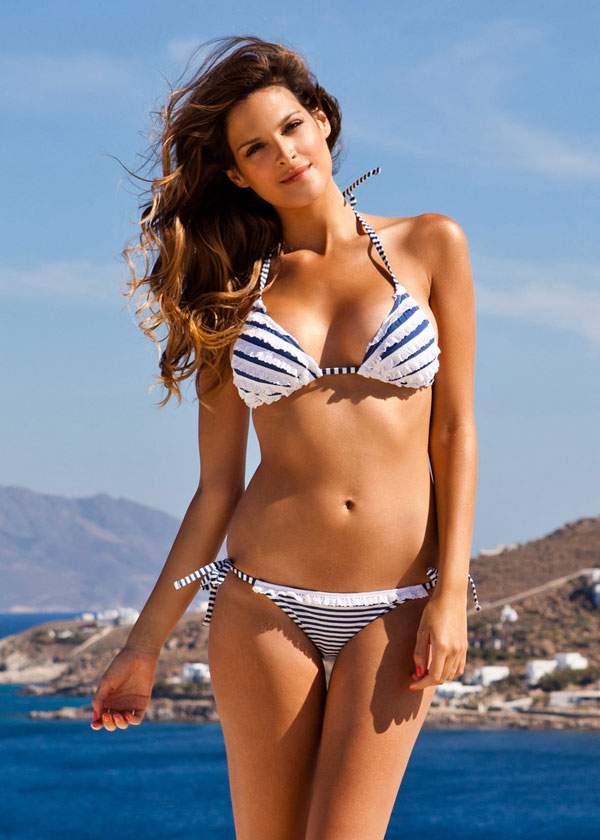

In [48]:
img = Image.open('girl1.jpg')
img

In [52]:
n = Nude('girl1.jpg')
n.parse()
print(n.result)
#n.showSkinRegions()

True


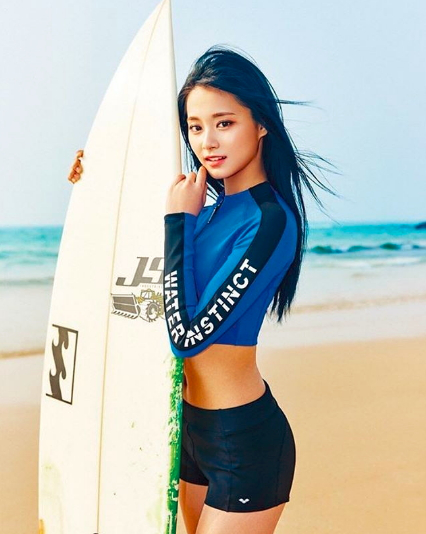

In [50]:
img = Image.open('girl2.jpg')
img

In [53]:
n = Nude('girl2.jpg')
n.parse()
print(n.result)
#n.showSkinRegions()

False


# 6. Other interesting or useful features

## (1) Masking and Transparency handling
- By using PIL, we can make certain part of the picture become transparent
- Also, we can add multiple layeys to the picture

from PIL import Image

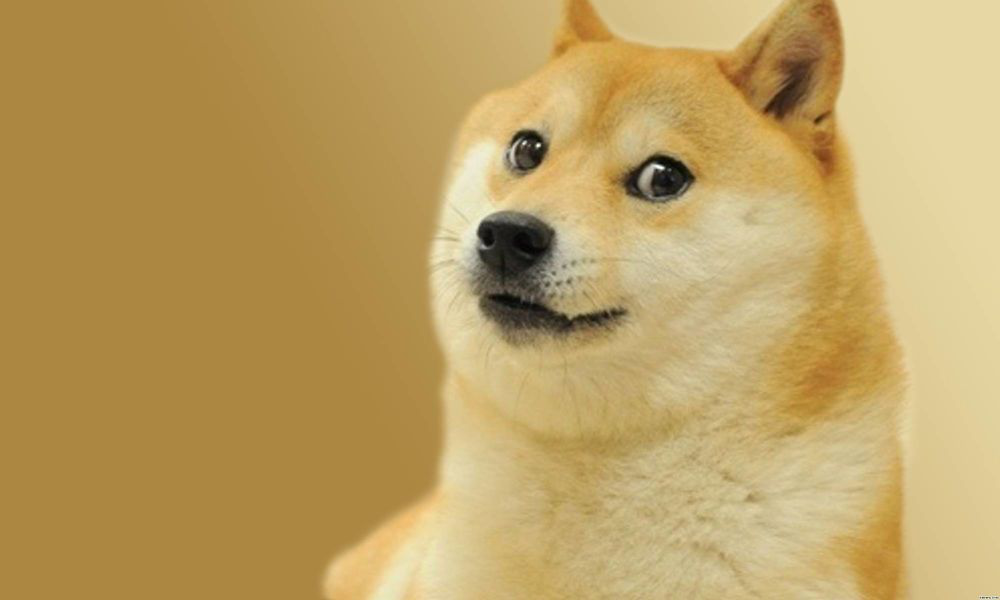

In [55]:
dogeIm=Image.open('doge.jpg')
dogeIm

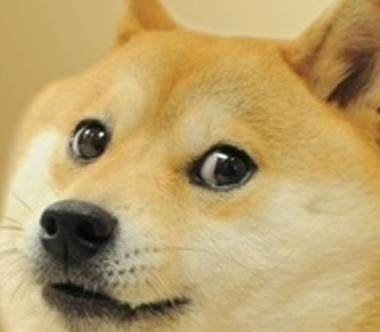

In [56]:
face=dogeIm.crop((437, 11, 817, 343))
face

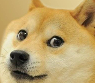

In [57]:
width, height = face.size
face=face.resize((int(width/4),int(height/4)))
face

In [58]:
BrainWashing = Image.new('RGBA', size=(1000,600)) ##generate an transparent picture

In [59]:
BrainWashingWidth,BrainWashingHeight=BrainWashing.size ##masking doge faces to the transparent picture
width,height=face.size
for left in range(0, BrainWashingHeight,width):
    for top in range(0, BrainWashingHeight,height):
        BrainWashing.paste(face, (left, top)) 

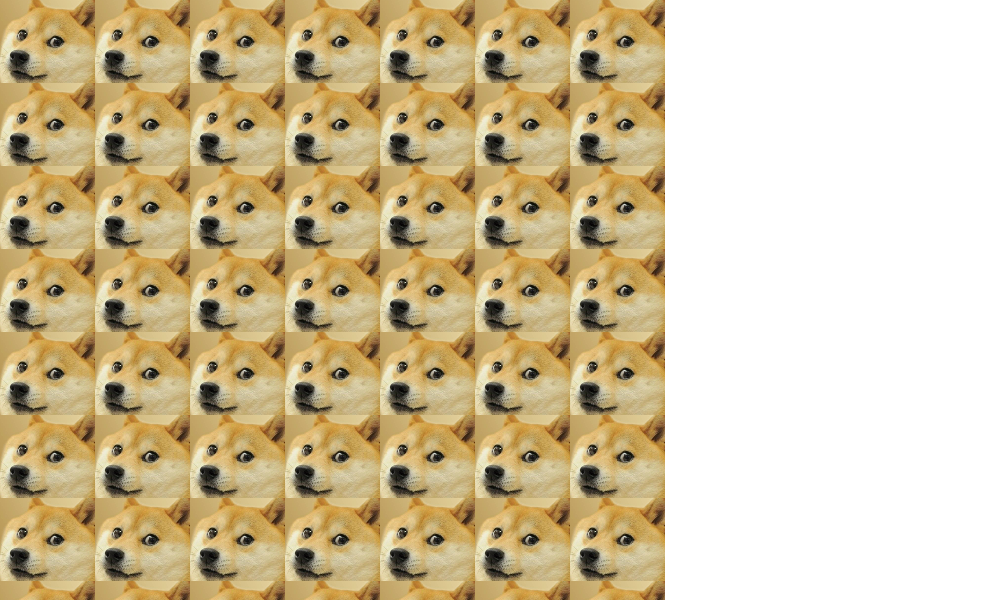

In [60]:
BrainWashing

## (2) image enhancement 
- like adjust contrast, brightness, color balance and sharpness.

## (3) reading and writing images
- could convert files like pdf to jpg
- creat jpg thubnails
- identify whether a file is image or not

## (4) Geometrical transforms
- rotate pictures
- change colors

# 7. Summary and personal assessment of the library 

* Pillow is easy to install, and code-compatible with PIL via minimal changes.

* It provides the following set of predefined image enhancement filters: BLUR, CONTOUR, DETAIL, EDGE_ENHANCE, EMBOSS, FIND_EDGES, SMOOTH, SHARPEN, which are very practical in image processing.

* However, although It is really easy to use Pillow to do some quick and dirty image manipulation, the syntax is clunky. So we think Pillow might not be suitable for complex image processing, computer vision, and image searching. It is better to use OpenSource Computer Vision (OpenCV) in this circumstance. 
 

# 8. References
  * http://pillow.readthedocs.io/en/latest/
  * https://en.wikipedia.org/wiki/Python_Imaging_Library
  * http://stackoverflow.com/questions/94875/image-processing-in-python
  * http://www.pythonforbeginners.com/modules-in-python/how-to-use-pillow
  * https://automatetheboringstuff.com/chapter17/
  * http://pillow.readthedocs.io/en/3.1.x/handbook/tutorial.html#reading-sequences
  * https://www.shiyanlou.com/courses/589